<a href="https://colab.research.google.com/github/Debora-Ibarra/Repositorio_EDP2/blob/main/Clank_Nicolson_Expl%C3%ADcito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Resolvemos la ecuación del calor:
$$\frac{\partial^2  u}{\partial t^2} (x,t) -4\frac{\partial^2 u}{\partial x^2} (x,t) = 0, \ 0<x<1 $$

sujeta a las condiciones de frontera:
$$u(0,t)=u(1,t)=0, \;\;\; t>0$$
Y la condición inicial:
$$u(x,0)=f (x),\;\;\;0<x<1$$
Y
$$\frac {\partial u}{\partial t} (x,0) =0, \ 0<x<1$$


En este caso particular:
$$f(x)= sen(\pi x)$$
Con
$$h=0.10,\ k=0.05$$

La solución exacta es:

$$
u(x,t)=sen(\pi x) cos (2 \pi t)$$

In [1]:
#Definimos las librerias que vamos a usar tanto para nuestros cálculos cómo para
# graficar
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # necesario para 3D
from matplotlib import cm  # colormap
from tabulate import tabulate

In [2]:
#Definimos nuestra función de la condición
def f(x):
 return np.sin(np.pi*x)

In [3]:
#Definimos la función para "tridiagonal" para poder obtener nuestra matriz más
#rápido y facil
def tridiagonal (n,a,b):
 return sp.Matrix([
 [a if i==j else b if abs (i-j)==1 else 0 for j in range (n)]
 for i in range (n)
 ])

In [4]:
r=1

In [5]:
A=tridiagonal(9,2-2*r,r)

In [6]:
A

Matrix([
[0, 1, 0, 0, 0, 0, 0, 0, 0],
[1, 0, 1, 0, 0, 0, 0, 0, 0],
[0, 1, 0, 1, 0, 0, 0, 0, 0],
[0, 0, 1, 0, 1, 0, 0, 0, 0],
[0, 0, 0, 1, 0, 1, 0, 0, 0],
[0, 0, 0, 0, 1, 0, 1, 0, 0],
[0, 0, 0, 0, 0, 1, 0, 1, 0],
[0, 0, 0, 0, 0, 0, 1, 0, 1],
[0, 0, 0, 0, 0, 0, 0, 1, 0]])

In [7]:
u0=sp.Matrix([f(0.1*(i+1)) for i in range(9)])

In [8]:
u1=u0

In [9]:
#Definimos la función con la que vamos a resolver nuestra matriz
def onda(A,u0, u1,j):
 #asegurar que u0 y u1 sean vectores columna
 u0=sp.Matrix(u0)
 u1=sp.Matrix(u1)

 S=[u0,u1]
 for n in range (2,j):
  sol=A*S[n-1]-S[n-2] #u^{n+1}
  S.append(sol)
 #Regresar como una matriz donde cada fila es una solución
 return sp.Matrix([s.T for s in S])

In [10]:
j=50

In [11]:
U=onda(A,u0,u1,j)

In [12]:
U_np=np.array(U.tolist(),dtype=float)

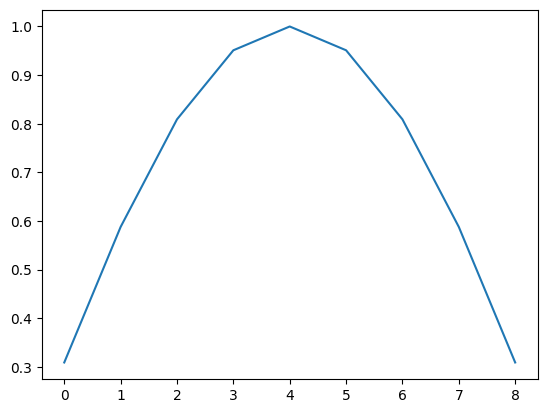

In [13]:
#Graficamos
plt.plot(U_np[0])

In [14]:
#Este es el vector que nos dan en el problema
val=[0.0,0.309016,0.587785,0.809016,0.951056,1,0.951056,0.809016,0.587785,0.309016,0.0]
u0_exact=np.array(val)

In [15]:
val

[0.0,
 0.309016,
 0.587785,
 0.809016,
 0.951056,
 1,
 0.951056,
 0.809016,
 0.587785,
 0.309016,
 0.0]

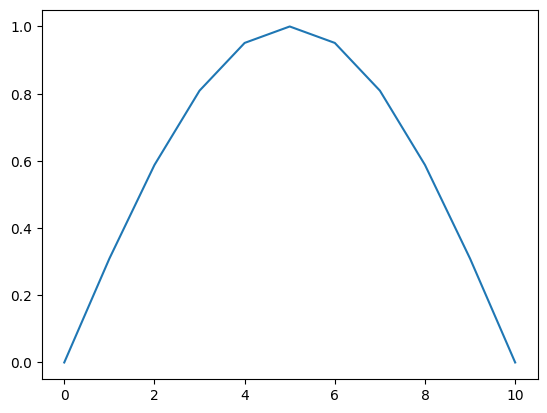

In [16]:
#Visualizamos la solución exacta
plt.plot(u0_exact)

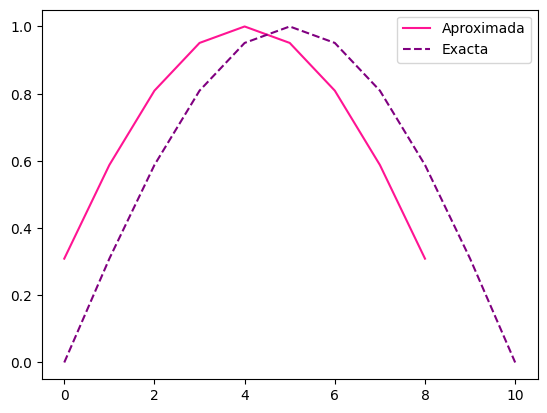

In [24]:
#Comparamos nuestras soluciones
plt.plot(U_np[0], label='Aproximada', color="deeppink")
plt.plot( u0_exact, '--', label='Exacta', color="purple")
plt.legend()
plt.show()

In [18]:
x = np.linspace(0, 1, 9)
y = np.linspace(0, 0.5, j)
X, Y = np.meshgrid(x, y)

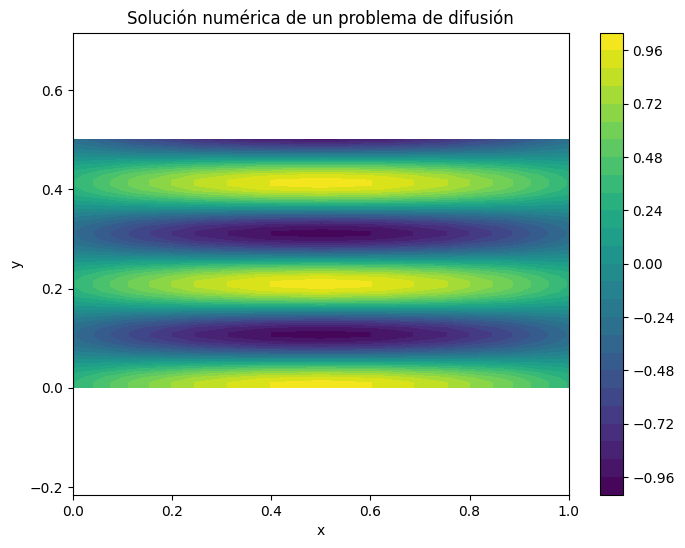

In [19]:
# Mapa de colores
plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, U_np, levels=25, cmap=cm.viridis)
plt.colorbar(contour)
plt.title('Solución numérica de un problema de difusión')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.show()

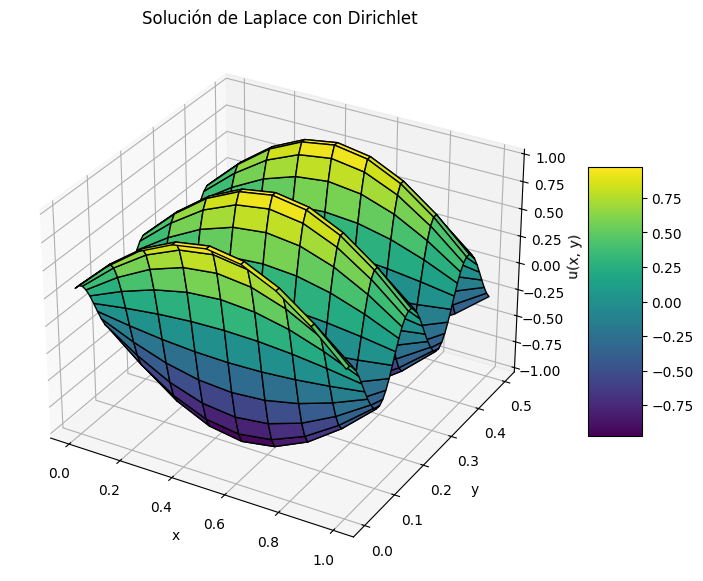

In [20]:
#Imprimimos en 3D (animación)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, U_np, cmap=cm.viridis, edgecolor='k')
ax.set_title('Solución de Laplace con Dirichlet')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u(x, y)')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()